In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    
    def fit(self, x, y=None):
        pass
    
    def predict(self, x):
        pred = np.zeros((x.shape[0], 1))
        
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i]  = 1
                
        return pred

In [2]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./ml_data/titanic_data.csv')
y_titanic_df = titanic_df['Survived']

In [4]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2)

In [11]:
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
accuracy_score(y_test, mypredictions)

0.7932960893854749

In [12]:
mypredictions

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [13]:
for i in range(len(x_test)):
    print(mypredictions[i], x_test.iloc[i])

[0.] Pclass       3.000000
Sex          1.000000
Age         29.699118
SibSp        0.000000
Parch        0.000000
Fare         7.750000
Cabin        7.000000
Embarked     2.000000
Name: 613, dtype: float64
[1.] Pclass       1.0
Sex          0.0
Age         36.0
SibSp        0.0
Parch        2.0
Fare        71.0
Cabin        1.0
Embarked     3.0
Name: 540, dtype: float64
[1.] Pclass       2.0
Sex          0.0
Age         24.0
SibSp        0.0
Parch        0.0
Fare        13.0
Cabin        7.0
Embarked     3.0
Name: 199, dtype: float64
[0.] Pclass       3.00
Sex          1.00
Age         29.00
SibSp        0.00
Parch        0.00
Fare         7.75
Cabin        7.00
Embarked     2.00
Name: 510, dtype: float64
[0.] Pclass       3.00
Sex          1.00
Age         55.50
SibSp        0.00
Parch        0.00
Fare         8.05
Cabin        7.00
Embarked     3.00
Name: 152, dtype: float64
[0.] Pclass       3.000000
Sex          1.000000
Age         29.699118
SibSp        0.000000
Parch        0.0

In [14]:
from sklearn.datasets import load_digits
from sklearn.base import BaseEstimator

In [15]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    
    def predict(self, x):
        return np.zeros((len(x),1), dtype=bool)

In [16]:
digits = load_digits()

In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
digits.data.shape  # 0~9 수를 길이 64 vector가 나타내는데, 그런 데이터가 1797개 존재...

(1797, 64)

In [19]:
digits.target  

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
len(digits.target)

1797

In [21]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [22]:
y = (digits.target == 7).astype(int)

In [23]:
x = digits.data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=11)

In [25]:
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train, y_train)
fakepred = fakeclf.predict(x_test)

In [26]:
accuracy_score(y_test, fakepred)

0.9

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [29]:
print(classification_report(y_test, fakepred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       405
           1       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450



C:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# accuray, recall, precision, f1_score
# precision_recall_score, roc_auc_score

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print(confusion)
    print('정확도:',round(accuracy,2), '정밀도:',round(precision,2), '재현율:',round(recall,2))

In [45]:
titanic_df = pd.read_csv('./ml_data/titanic_data.csv')

In [46]:
y = titanic_df['Survived']
x = titanic_df.drop('Survived', axis=1)
x = transform_features(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log = LogisticRegression()
log.fit(x_train, y_train)
pred = log.predict(x_test)

C:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
get_clf_eval(y_test, pred)

[[94 19]
 [19 47]]
정확도: 0.79 정밀도: 0.71 재현율: 0.71


In [51]:
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [63]:
pred_proba = log.predict_proba(x_test)   # 모델은 확률값으로 리턴
pred_proba

array([[0.34808673, 0.65191327],
       [0.22616457, 0.77383543],
       [0.0748295 , 0.9251705 ],
       [0.88757057, 0.11242943],
       [0.91507808, 0.08492192],
       [0.50015339, 0.49984661],
       [0.91160562, 0.08839438],
       [0.02683471, 0.97316529],
       [0.89613055, 0.10386945],
       [0.239019  , 0.760981  ],
       [0.68398835, 0.31601165],
       [0.85754826, 0.14245174],
       [0.15362576, 0.84637424],
       [0.06403283, 0.93596717],
       [0.8981901 , 0.1018099 ],
       [0.38287653, 0.61712347],
       [0.04065494, 0.95934506],
       [0.88533356, 0.11466644],
       [0.78786837, 0.21213163],
       [0.29210225, 0.70789775],
       [0.23832073, 0.76167927],
       [0.58478145, 0.41521855],
       [0.90011368, 0.09988632],
       [0.97071303, 0.02928697],
       [0.87891664, 0.12108336],
       [0.8981901 , 0.1018099 ],
       [0.88278634, 0.11721366],
       [0.17973063, 0.82026937],
       [0.89609432, 0.10390568],
       [0.88763516, 0.11236484],
       [0.

In [56]:
(log.predict_proba(x_test)[:, 1] >0.5).astype(int)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [57]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [59]:
binarizer = Binarizer(threshold=0.5) 

binarizer.fit_transform(log.predict_proba(x_test)[:, 1].reshape(1, -1))

array([[1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 0.]])

In [62]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5   # predict함수가 return 한 값과 동일한 결과,,,

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[94 19]
 [19 47]]
정확도: 0.79 정밀도: 0.71 재현율: 0.71


In [64]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.4   # predict함수가 return 한 값과 동일한 결과,,,

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[86 27]
 [17 49]]
정확도: 0.75 정밀도: 0.64 재현율: 0.74


In [65]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
[[86 27]
 [17 49]]
정확도: 0.75 정밀도: 0.64 재현율: 0.74
임곗값: 0.45
[[89 24]
 [17 49]]
정확도: 0.77 정밀도: 0.67 재현율: 0.74
임곗값: 0.5
[[94 19]
 [19 47]]
정확도: 0.79 정밀도: 0.71 재현율: 0.71
임곗값: 0.55
[[96 17]
 [20 46]]
정확도: 0.79 정밀도: 0.73 재현율: 0.7
임곗값: 0.6
[[101  12]
 [ 23  43]]
정확도: 0.8 정밀도: 0.78 재현율: 0.65


In [66]:
# logisticregression에서 predict함수의 threshold의 default값은 0.5 
# threshold값이 바뀌면서 predict값이 바뀌고, precision, recall, accuracy가 바뀐...
# threshold가 커지면 precision이 커지고, threshold가 작아지면 recall이 커진다..
# 어떤 threshold값이 가장 좋은가..?
# precision이 좋고, recall도 동시에 높은 임계값이 좋다
# dt, knn, svc, rfc 중에서 어떤 모델을 선택해야 하는가 => precision과 recall이 가장 좋은 모델을 선택..

In [70]:
from sklearn.metrics import precision_recall_curve

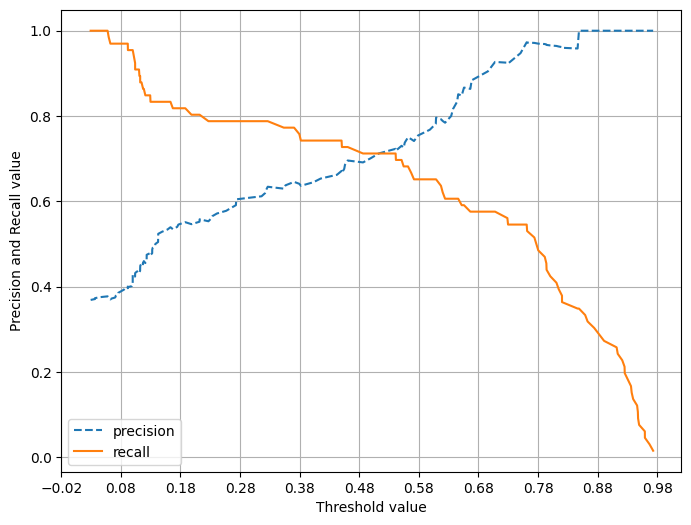

In [98]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    # 모든 threshold값에서의 precision, recall값을 리턴
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    return precisions, recalls, thresholds
    
precisions, recalls, thresholds = precision_recall_curve_plot( y_test, log.predict_proba(x_test)[:, 1] )


# threshold값이 커지면서 precision은 커지고, recall값은 작아진다..

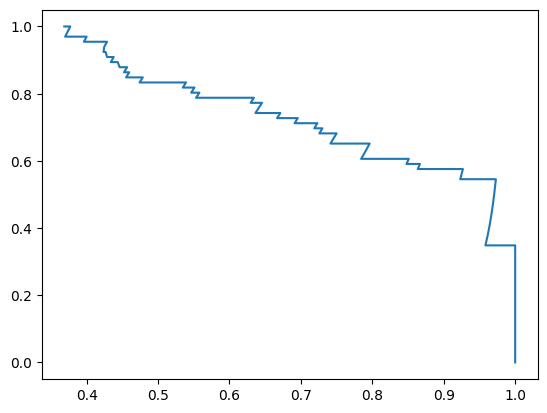

In [91]:
plt.plot(precisions, recalls)

In [92]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train, y_train)
proba_svc = svc.predict_proba(x_test)[:, 1]
preds_svc = svc.predict(x_test)

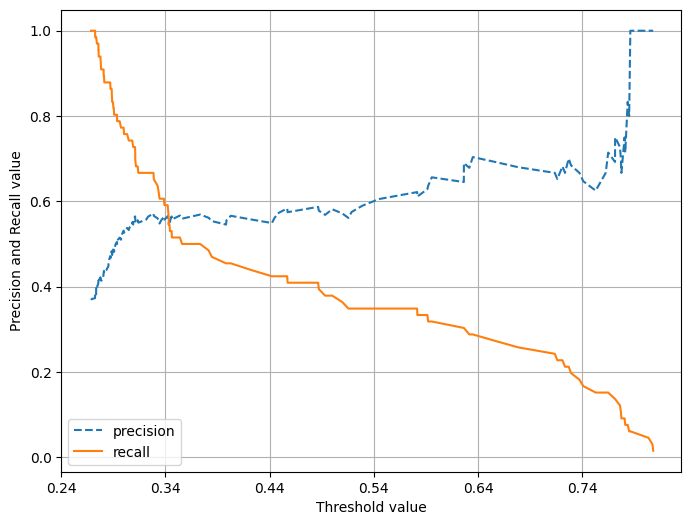

In [93]:
precision_svc, recall_svc, thresholds_svc = precision_recall_curve_plot(y_test , proba_svc)

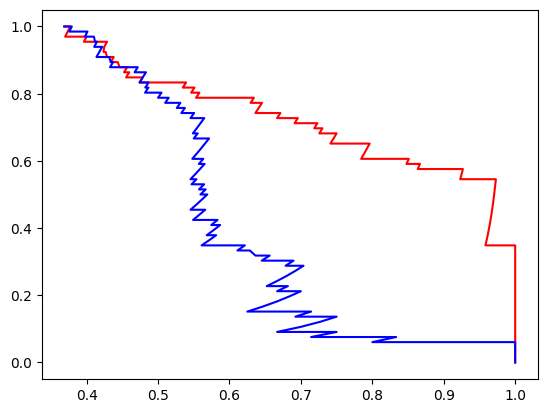

In [94]:
plt.plot(precisions, recalls, c='red')
plt.plot(precision_svc, recall_svc, c='blue')

In [95]:
from sklearn.metrics import average_precision_score
print('log_aps:', average_precision_score(y_test, log.predict_proba(x_test)[:, 1]))
print('svc_aps:', average_precision_score(y_test, proba_svc))

log_aps: 0.8198935566152524
svc_aps: 0.6010756199530024


In [102]:
precisions

array([0.36871508, 0.37078652, 0.37288136, 0.375     , 0.37714286,
       0.37356322, 0.3699422 , 0.37209302, 0.37426901, 0.37647059,
       0.37869822, 0.38095238, 0.38323353, 0.38554217, 0.38787879,
       0.3902439 , 0.39263804, 0.39751553, 0.4       , 0.39622642,
       0.39873418, 0.40127389, 0.40384615, 0.40645161, 0.42281879,
       0.42857143, 0.42465753, 0.42361111, 0.42657343, 0.42857143,
       0.43165468, 0.43478261, 0.4379562 , 0.43382353, 0.43703704,
       0.44360902, 0.44615385, 0.4496124 , 0.453125  , 0.45669291,
       0.45238095, 0.456     , 0.45967742, 0.45528455, 0.45901639,
       0.46280992, 0.46666667, 0.47058824, 0.47457627, 0.47863248,
       0.47413793, 0.47826087, 0.48245614, 0.48672566, 0.49107143,
       0.4954955 , 0.5       , 0.50458716, 0.50925926, 0.51401869,
       0.51886792, 0.52380952, 0.52884615, 0.53398058, 0.53921569,
       0.53465347, 0.54      , 0.54545455, 0.55102041, 0.54639175,
       0.55208333, 0.55789474, 0.55319149, 0.55913978, 0.56521

In [103]:
recalls

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98484848, 0.96969697, 0.96969697, 0.96969697, 0.96969697,
       0.96969697, 0.96969697, 0.96969697, 0.96969697, 0.96969697,
       0.96969697, 0.96969697, 0.96969697, 0.96969697, 0.95454545,
       0.95454545, 0.95454545, 0.95454545, 0.95454545, 0.95454545,
       0.95454545, 0.93939394, 0.92424242, 0.92424242, 0.90909091,
       0.90909091, 0.90909091, 0.90909091, 0.89393939, 0.89393939,
       0.89393939, 0.87878788, 0.87878788, 0.87878788, 0.87878788,
       0.86363636, 0.86363636, 0.86363636, 0.84848485, 0.84848485,
       0.84848485, 0.84848485, 0.84848485, 0.84848485, 0.84848485,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.81818182, 0.81818182, 0.81818182, 0.81818182, 0.8030303 ,
       0.8030303 , 0.8030303 , 0.78787879, 0.78787879, 0.78787

In [104]:
thresholds

array([0.02928697, 0.03647296, 0.03656638, 0.0435752 , 0.05769324,
       0.0595921 , 0.06240357, 0.06459427, 0.07009302, 0.07119853,
       0.07139971, 0.07282673, 0.07571774, 0.07582984, 0.07870604,
       0.08174556, 0.08492192, 0.08839438, 0.09160522, 0.09162369,
       0.09180327, 0.09877295, 0.09986098, 0.09988632, 0.09989238,
       0.09989483, 0.1018099 , 0.10386945, 0.10390568, 0.1039089 ,
       0.10393447, 0.10641713, 0.11043685, 0.1111229 , 0.11225947,
       0.11236484, 0.11242943, 0.11267995, 0.11458802, 0.11466644,
       0.11721366, 0.11731788, 0.11852031, 0.12108336, 0.12169268,
       0.1232665 , 0.12328753, 0.1233064 , 0.12331368, 0.12921321,
       0.12971426, 0.13254403, 0.1325777 , 0.13259046, 0.13338046,
       0.13743664, 0.13786388, 0.1424413 , 0.14244507, 0.14245174,
       0.14252907, 0.14272873, 0.14945437, 0.15832818, 0.16321193,
       0.1671992 , 0.17452853, 0.1764511 , 0.1881071 , 0.198443  ,
       0.21194931, 0.21213163, 0.2269386 , 0.23104558, 0.23353

In [107]:
prt = pd.DataFrame({'precision': precisions[1:], 'recalls':recalls[1:], 'thresholds':thresholds})
prt.head()

,precision,recalls,thresholds
0,0.370787,1.000000,0.029287
1,0.372881,1.000000,0.036473
2,0.375000,1.000000,0.036566
3,0.377143,1.000000,0.043575
4,0.373563,0.984848,0.057693


In [108]:
prt['mu'] = prt['precision']*prt['recalls']

In [109]:
prt.sort_values('mu', ascending=False)

,precision,recalls,thresholds,mu
123,0.926829,0.575758,0.695849,0.533629
127,0.972973,0.545455,0.750606,0.530713
122,0.904762,0.575758,0.668620,0.520924
110,0.796296,0.651515,0.608438,0.518799
124,0.925000,0.560606,0.707898,0.518561
...,...,...,...,...
160,1.000000,0.060606,0.949619,0.060606
161,1.000000,0.045455,0.959226,0.045455
162,1.000000,0.030303,0.959345,0.030303
163,1.000000,0.015152,0.967084,0.015152


In [ ]:
# precision - 높을 수록 좋다
# recall - 높을 수록 좋다

In [111]:
# ROC Curve와 AUC

# TPR - 재현율, 실제 True인 데이터를 True라고 예측한 비율 (맞춘 것) - 좋은 지표, 높을수록 좋고
# FPR - 거짓양성비율, 실제 False인 데이터에서 True라고 잘못 예측한 비율 (잘못 예측) - 나쁜 지표, 낮을수록 좋다

In [112]:
from sklearn.metrics import roc_curve

In [114]:
predict_proba_log = log.predict_proba(x_test)[:,1]

In [116]:
fprs, tprs, thresholds = roc_curve(y_test, predict_proba_log)

Text(0, 0.5, 'tpr')

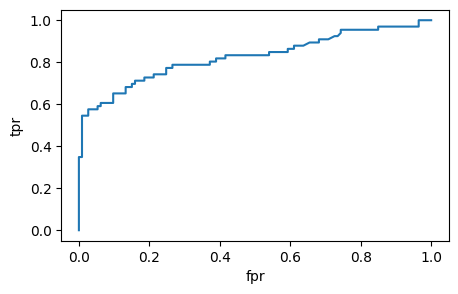

In [120]:
plt.figure(figsize=(5,3))
plt.plot(fprs, tprs)
plt.xlabel('fpr')
plt.ylabel('tpr')

# 우상향 그래프
# 좌상단으로 그래프가 붙을수록 좋은 모델..

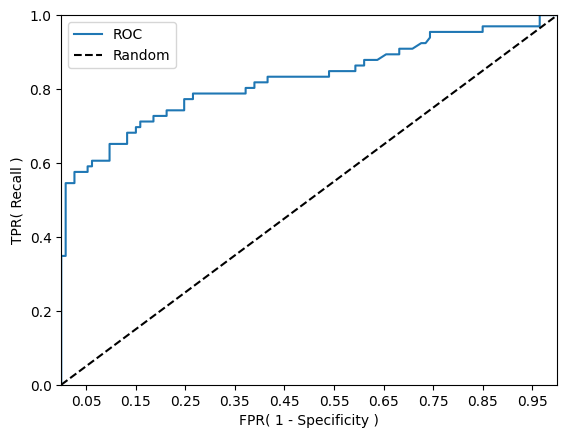

In [122]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, predict_proba_log )

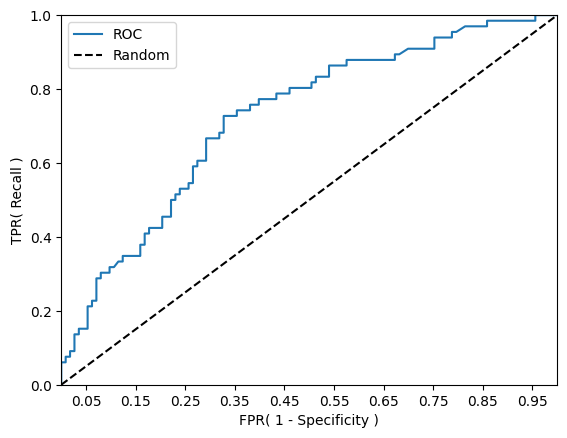

In [123]:
roc_curve_plot(y_test, proba_svc )

In [124]:
fprs_svc, tprs_svc, thresholds_svc = roc_curve(y_test, proba_svc)

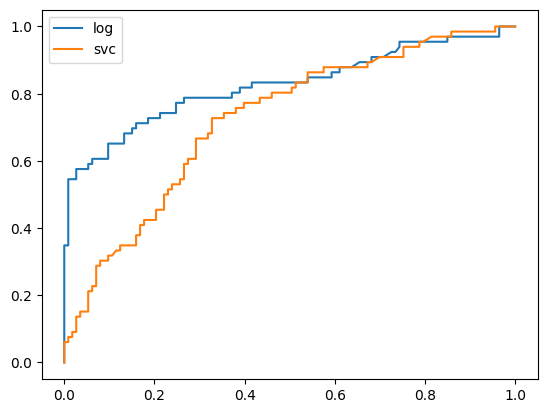

In [125]:
plt.plot(fprs, tprs, label='log')
plt.plot(fprs_svc, tprs_svc, label='svc')
plt.legend()

In [127]:
from sklearn.metrics import roc_auc_score

roc_score_log = roc_auc_score(y_test, predict_proba_log)
roc_score_svc = roc_auc_score(y_test, proba_svc)

print('roc_log :', roc_score_log)
print('roc_svc :', roc_score_svc)

roc_log : 0.8252212389380531
roc_svc : 0.7234513274336283


In [ ]:
# accuracy, precision, recall, f1_score, precision_recall_curve, roc_auc_score